# Регрессия

## 1. Линейная регрессия

### 1.1 Загрузите набор данных соответствующей цифре вашего варианта. Убедитесь, что загрузка прошла корректно.


In [ ]:
import pandas as pd


RS = 42
lin4 = pd.read_csv('sample_data/lab3_lin4.csv')
lin4.head()

,x1,x2,y
0,1.1414,-0.0594,55.2686
1,-0.1517,-1.3385,-50.3732
2,-2.8140,0.1431,-145.5692
3,-0.6642,0.5702,-16.0423
4,-0.2069,-0.1609,-16.1340


In [ ]:
from scipy.stats import shapiro


def shapiro_test(data):
    columns = data.columns
    for column in columns:
        pvalue = shapiro(data[column]).pvalue
        print(f"column: {column}\tpvalue: {pvalue}")

In [ ]:
shapiro_test(lin4.iloc[:, :-1])

column: x1	pvalue: 0.38795149326324463
column: x2	pvalue: 0.6063389778137207


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler


lin4_np = StandardScaler().fit_transform(lin4)
lin4 = pd.DataFrame(data=lin4_np.T, index=['x1', 'x2', 'y']).T

### 1.2 Используя train_test_split разбейте выборку на обучающую и тестовую. Проверьте, что тестовая выборка соответствует обучающей. Можно испльзовать диаграммы рассеяния/нормированные гистограммы/boxplot/violin plot.

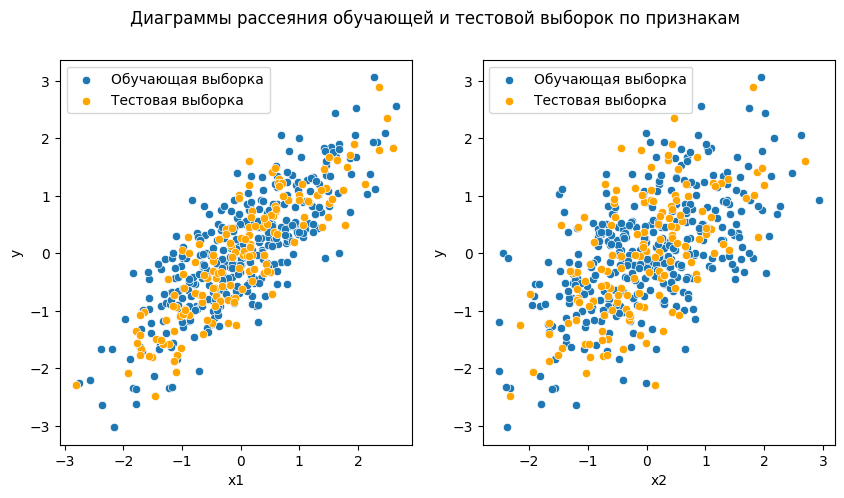

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(lin4.iloc[:, :-1],
                                                    lin4['y'],
                                                    test_size=0.3,
                                                    random_state=RS)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
sns.scatterplot(x=X_train['x1'], y=y_train, ax=axes[0],
                label='Обучающая выборка')
sns.scatterplot(x=X_test['x1'], y=y_test, ax=axes[0], c='orange',
                label='Тестовая выборка')
sns.scatterplot(x=X_train['x2'], y=y_train, ax=axes[1],
                label='Обучающая выборка')
sns.scatterplot(x=X_test['x2'], y=y_test, ax=axes[1], c='orange',
                label='Тестовая выборка')
fig.suptitle('Диаграммы рассеяния обучающей и тестовой выборок по признакам')
plt.show()

### 1.3. Проведите линейную регрессию используя LinearRegression. Получите коэффициенты регрессии и объясните полученные результаты.

In [ ]:
lin4_np = MinMaxScaler().fit_transform(lin4)
lin4_norm = pd.DataFrame(data=lin4_np.T, index=['x1', 'x2', 'y']).T

In [ ]:
X_train_tmp, X_test_tmp, y_train_tmp, y_test_tmp = train_test_split(
    lin4_norm.iloc[:, :-1], lin4_norm['y'], test_size=0.3, random_state=RS)

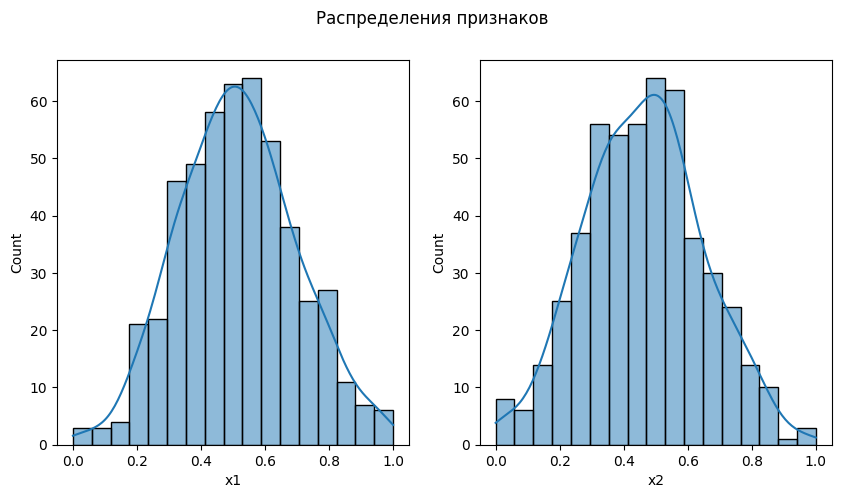

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
sns.histplot(x=lin4_norm['x1'], ax=axes[0], kde=True)
sns.histplot(x=lin4_norm['x2'], ax=axes[1], kde=True)
fig.suptitle('Распределения признаков')
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression


lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
print(f"coeffs = {lin_reg.coef_}")
print(f"intercept = {lin_reg.intercept_}")

coeffs = [0.81366501 0.56053529]
intercept = 0.0024023154635082443


In [ ]:
lin_reg.fit(X_train, y_train)
print(f"coeffs = {lin_reg.coef_}")
print(f"intercept = {lin_reg.intercept_}")

coeffs = [0.81366501 0.56053529]
intercept = 0.0024023154635082443


### 1.4. Для обучающей и тестовой выборки рассчитайте коэффициент детерминации, MAPE, MAE. Объясните полученные значений метрик. Сравните метрики для обучающей и тестовой выборки, сделайте выводы о качестве обобщения полученной модели.


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, \
    mean_absolute_percentage_error
from statsmodels.stats.stattools import durbin_watson
from statsmodels. stats.diagnostic import het_white
import numpy as np
from scipy.stats import jarque_bera


def compute_regression_metrics(y_pred_train, y_pred_test, model):
    dw_train = durbin_watson(y_pred_train - y_train)
    dw_test = durbin_watson(y_pred_test - y_test)
    X_train_tmp = np.insert(X_train, 0, np.ones(len(X_train)), axis=1)
    X_test_tmp = np.insert(X_test, 0, np.ones(len(X_test)), axis=1)
    _, _, _, white_train = het_white(y_pred_train - y_train, X_train_tmp)
    _, _, _, white_test = het_white(y_pred_test - y_test, X_test_tmp)
    if len(y_pred_train) <= 5000:
        _, norm_distr_train = shapiro(y_pred_train - y_train)
        _, norm_distr_test = shapiro(y_pred_test - y_test)
    else:
        _, norm_distr_train = jarque_bera(y_pred_train - y_train)
        _, norm_distr_test = jarque_bera(y_pred_test - y_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    print(f"r2_train = {r2_train}; r2_test = {r2_test}")
    mae_train = mean_absolute_error(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred_test)
    print(f"mae_train = {mae_train}; mae_test = {mae_test}")
    mape_train = mean_absolute_percentage_error(y_train, y_pred_train) * 100
    mape_test = mean_absolute_percentage_error(y_test, y_pred_test) * 100
    print(f"mape_train = {mape_train}; mape_test = {mape_test}")
    models_info[model] += [r2_train, r2_test, mae_train, mae_test,
                           mape_train, mape_test, dw_train, dw_test,
                           white_train, white_test, norm_distr_train, norm_distr_test]

In [ ]:
y_pred_train = lin_reg.predict(X_train)
y_pred_test = lin_reg.predict(X_test)
models_info = {'LinearRegression': [lin_reg.coef_, lin_reg.intercept_]}
compute_regression_metrics(y_pred_train, y_pred_test, 'LinearRegression')

r2_train = 0.9957121249224917; r2_test = 0.9967883257132645
mae_train = 0.05102671267559768; mae_test = 0.04876932790875637
mape_train = 24.717129772737678; mape_test = 50.25875365386161


### 1.5.1. Лассо регрессия. Самостоятельно подберите гиперпараметры


In [ ]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.model_selection import GridSearchCV


def print_best_estimator(X, y, estimator, params):
    scoring = ['r2', 'neg_mean_absolute_error',
               'neg_mean_absolute_percentage_error']
    gscv = GridSearchCV(estimator=estimator, param_grid=params, scoring=scoring,
                        refit='r2')
    gscv.fit(X, y)
    print(gscv.best_estimator_)
    print(f"R2 = {gscv.best_score_}")

In [ ]:
print_best_estimator(lin4.iloc[:, :-1], lin4['y'],
                     Lasso(), {'alpha': np.arange(0.0001, 0.1001, 0.0001)})

In [ ]:
print_best_estimator(lin4.iloc[:, :-1], lin4['y'],
                     Lasso(), {'alpha': [1e-15, 1e-14, 1e-13]})

Lasso(alpha=1e-15)
R2 = 0.9959136752121207


In [ ]:
np.finfo(float).tiny

In [ ]:
lasso = Lasso(1e-15)
lasso.fit(X_train, y_train)
models_info['Lasso'] = [lasso.coef_, lasso.intercept_ ]
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)
compute_regression_metrics(y_pred_train, y_pred_test, 'Lasso')

r2_train = 0.9957121249224917; r2_test = 0.9967883257132645
mae_train = 0.051026712675597684; mae_test = 0.048769327908756196
mape_train = 24.717129772737643; mape_test = 50.25875365386152


### 1.5.2. Гребневая регрессия. Самостоятельно подберите гиперпараметры


In [ ]:
print_best_estimator(lin4.iloc[:, :-1], lin4['y'],
                     Ridge(), {'alpha': np.arange(0.0001, 0.3001, 0.0001)})

In [ ]:
print_best_estimator(lin4.iloc[:, :-1], lin4['y'],
                     Ridge(), {'alpha': [1e-15]})

Ridge(alpha=1e-15)
R2 = 0.9959136752121207


In [ ]:
ridge = Ridge(1e-15)
ridge.fit(X_train, y_train)
models_info['Ridge'] = [ridge.coef_, ridge.intercept_]
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)
compute_regression_metrics(y_pred_train, y_pred_test, 'Ridge')

r2_train = 0.9957121249224917; r2_test = 0.9967883257132645
mae_train = 0.05102671267559767; mae_test = 0.04876932790875634
mape_train = 24.717129772737824; mape_test = 50.25875365386133


### 1.5.3. ElasticNet. Самостоятельно подберите гиперпараметры

In [ ]:
print_best_estimator(lin4.iloc[:, :-1], lin4['y'],
                     ElasticNet(), {'alpha': [1e-8, 1e-7], \
                                    'l1_ratio': [1e-8]})

ElasticNet(alpha=1e-08, l1_ratio=1e-08)
R2 = 0.9959136752048924


ElasticNet(alpha=1e-08, l1_ratio=1e-08)

R2 = 0.9959136752048924

In [ ]:
en = ElasticNet(alpha=1e-8, l1_ratio=1e-8)
en.fit(X_train, y_train)
models_info['ElasticNet'] = [en.coef_, en.intercept_]
y_pred_train = en.predict(X_train)
y_pred_test = en.predict(X_test)
compute_regression_metrics(y_pred_train, y_pred_test, 'ElasticNet')

r2_train = 0.9957121249224916; r2_test = 0.9967883257812304
mae_train = 0.05102671269855512; mae_test = 0.04876932680638668
mape_train = 24.71712968081688; mape_test = 50.258752786321125


r2_train = 0.9957121249224917; r2_test = 0.9967883257132645

mae_train = 0.051026712675597684; mae_test = 0.048769327908756196

mape_train = 24.717129772737643; mape_test = 50.25875365386152


### 1.5.4. Регрессия оптимизируемая градиентным спуском


In [ ]:
import tensorflow as tf


def gradient_descent(X, y):
    X_tf = tf.constant(X, dtype=tf.float64)
    X_tf_T = tf.transpose(X_tf)
    y_tf = tf.constant(y, dtype=tf.float64)
    w = tf.Variable([np.random.randn() for _ in range(len(X[0]))],
                    dtype=tf.float64)
    epoch = 0
    while epoch < 1000:
        with tf.GradientTape() as tape:
            y_pred = tf.linalg.matvec(X_tf, w)
            loss = tf.square(tf.norm(y_pred - y_tf, ord='euclidean'))
        grad_true = tape.gradient(loss, w)
        grad = tf.reshape(grad_true, shape=[len(X[0]), 1])
        grad_T = tf.transpose(grad)
        numerator = tf.linalg.matvec(tf.matmul(grad_T, X_tf_T),
                                    tf.linalg.matvec(X_tf, w) - y_tf)
        denominator = tf.matmul(tf.matmul(grad_T, X_tf_T), X_tf) @ grad
        alpha = tf.squeeze(numerator / denominator)
        if alpha < 0:
            w = tf.Variable([np.random.randn() for _ in range(len(X[0]))],
                            dtype=tf.float64)
            epoch = 0
            continue
        if tf.reduce_all(tf.math.less(tf.abs(alpha*grad_true),
                                    tf.constant(1e-4, dtype=tf.float64))):
            break
        w.assign_add(-(alpha*grad_true))
        epoch += 1
    return w

In [ ]:
X_train_tmp = np.insert(X_train, 0, np.ones(len(X_train)), axis=1)
X_test_tmp = np.insert(X_test, 0, np.ones(len(X_test)), axis=1)
w = gradient_descent(X_train_tmp, y_train)
y_pred_train = tf.linalg.matvec(X_train_tmp, w)
y_pred_test = tf.linalg.matvec(X_test_tmp, w)
models_info['GradientDescent'] = [w[1:].numpy(), w[0].numpy()]
compute_regression_metrics(y_pred_train, y_pred_test, 'GradientDescent')

r2_train = 0.995712117103646; r2_test = 0.9967883867552491
mae_train = 0.05102669719863653; mae_test = 0.048765855591480736
mape_train = 24.741536299107324; mape_test = 50.187938647658456


### 1.6. Постройте сводную таблицу для рассчитываемых метрик, и используемых методов (с разделением на обучающую и тестовую выборку). По таблице сделайте выводы о том, какой вид регрессии дал лучшую модель. Опишите какие проблемы могут возникнуть при применении каждой модели. Для объяснения результатов можно построить “карту высот (heat map)” с отображением корреляции признаков.


Text(0.5, 1.0, 'Карта высот')

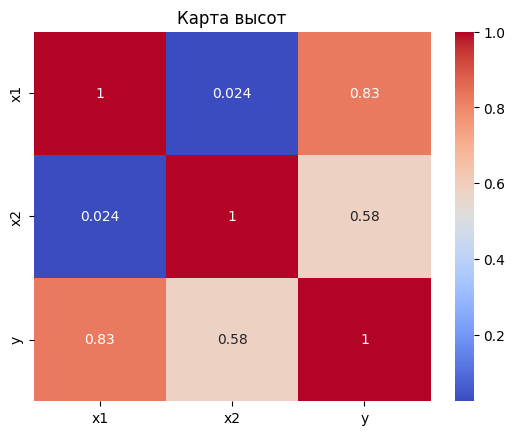

In [ ]:
sns.heatmap(lin4.corr(), cmap='coolwarm', annot=True).set_title('Карта высот')

In [ ]:
lin4.describe()

,x1,x2,y
count,5.000000e+02,5.000000e+02,5.000000e+02
mean,2.131628e-17,-1.421085e-17,1.243450e-17
std,1.001002e+00,1.001002e+00,1.001002e+00
min,-2.811317e+00,-2.518379e+00,-3.022006e+00
25%,-6.893768e-01,-6.824080e-01,-6.787128e-01
50%,-2.777939e-02,-3.082992e-03,-2.395380e-02
75%,6.205010e-01,6.628965e-01,6.430093e-01
max,2.650833e+00,2.926398e+00,3.061236e+00


In [ ]:
models_info_pd = pd.DataFrame(models_info, index=['coeffs', 'intercept',
                                                  'r2_train', 'r2_test',
                                                  'mae_train', 'mae_test',
                                                  'mape_train', 'mape_test',
                                                  'dw_train', 'dw_test',
                                                  'white_train', 'white_test',
                                                  'norm_distr_train',
                                                  'norm_distr_test']).T
models_info_pd

,coeffs,intercept,r2_train,r2_test,mae_train,mae_test,mape_train,mape_test,dw_train,dw_test,white_train,white_test,norm_distr_train,norm_distr_test
LinearRegression,"[0.8136650070277945, 0.560535291286712]",0.002402,0.995712,0.996788,0.051027,0.048769,24.71713,50.258754,2.189571,2.234512,0.539287,0.450069,0.765397,0.227989
Lasso,"[0.8136650070277932, 0.5605352912867111]",0.002402,0.995712,0.996788,0.051027,0.048769,24.71713,50.258754,2.189571,2.234512,0.539287,0.450069,0.765397,0.227989
Ridge,"[0.8136650070277943, 0.5605352912867123]",0.002402,0.995712,0.996788,0.051027,0.048769,24.71713,50.258754,2.189571,2.234512,0.539287,0.450069,0.765397,0.227989
ElasticNet,"[0.813664998492682, 0.5605352857957059]",0.002402,0.995712,0.996788,0.051027,0.048769,24.71713,50.258753,2.189571,2.234512,0.539287,0.450069,0.765467,0.227979
GradientDescent,"[0.8136618379476453, 0.5605393477718433]",0.002405,0.995712,0.996788,0.051027,0.048769,24.719226,50.253996,2.189536,2.23449,0.539373,0.450276,0.765469,0.227877


In [ ]:
lin4.describe()

,x1,x2,y
count,5.000000e+02,5.000000e+02,5.000000e+02
mean,2.131628e-17,-1.421085e-17,1.243450e-17
std,1.001002e+00,1.001002e+00,1.001002e+00
min,-2.811317e+00,-2.518379e+00,-3.022006e+00
25%,-6.893768e-01,-6.824080e-01,-6.787128e-01
50%,-2.777939e-02,-3.082992e-03,-2.395380e-02
75%,6.205010e-01,6.628965e-01,6.430093e-01
max,2.650833e+00,2.926398e+00,3.061236e+00


In [ ]:
for i in range(len(models_info_pd)):
    print(f"{models_info_pd.index[i]}:")
    print(f"\tr2 = {np.abs(models_info_pd.iloc[i, 2] - models_info_pd.iloc[i, 3])}")
    print(f"\tmae = {np.abs(models_info_pd.iloc[i, 4] - models_info_pd.iloc[i, 5])}")
    print(f"\tmape = {np.abs(models_info_pd.iloc[i, 6] - models_info_pd.iloc[i, 7])}")

LinearRegression: r2, mae

Lasso: 0

Ridge: mape

ElasticNet:

GradientDescent:

### 1.7. Для модели, которая дала лучшие результаты, постройте диаграмму рассеяния между предикторами и откликом. На диаграмме изобразите какое значение должно быть, и какое предсказывается. Визуально оцените качестве построенного регрессора.


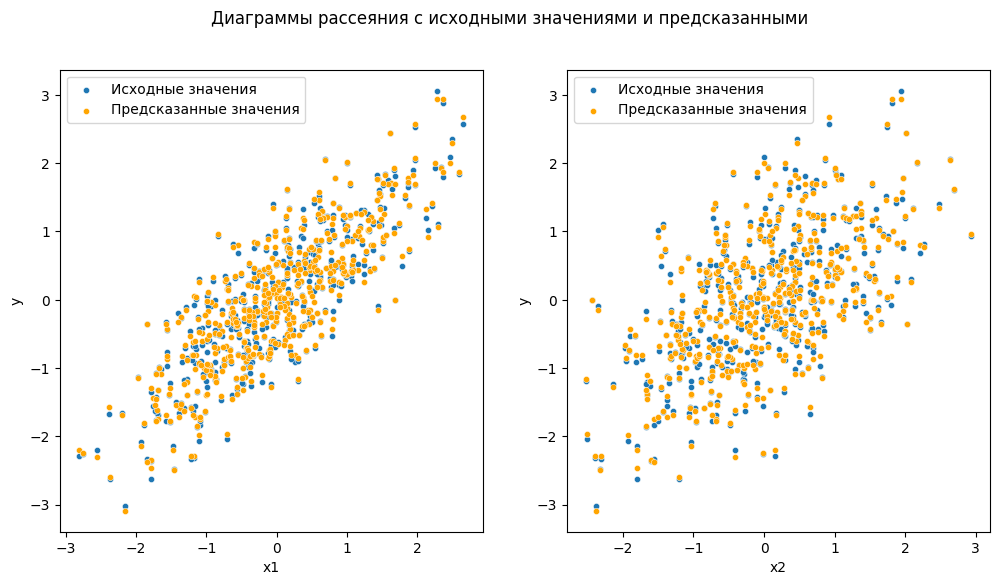

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
sns.scatterplot(x=lin4['x1'], y=lin4['y'], ax=axes[0],
                label='Исходные значения', s=20)
sns.scatterplot(x=lin4['x1'], y=lin_reg.predict(lin4.iloc[:, :-1]), ax=axes[0], c='orange',
                label='Предсказанные значения', s=20)
sns.scatterplot(x=lin4['x2'], y=lin4['y'], ax=axes[1],
                label='Исходные значения', s=20)
sns.scatterplot(x=lin4['x2'], y=lin_reg.predict(lin4.iloc[:, :-1]), ax=axes[1], c='orange',
                label='Предсказанные значения', s=20)
fig.suptitle('Диаграммы рассеяния с исходными значениями и предсказанными')
plt.show()

## 2. Нелинейная регрессия

### 2.1. Загрузите набор данных соответствующей букве вашего варианта. Убедитесь, что загрузка прошла корректно.


In [ ]:
poly2 = pd.read_csv('sample_data/lab3_poly2.csv')
poly2.head()

,x,y
0,1.2429,0.2452
1,-0.6314,-1.0334
2,0.9256,1.9695
3,0.6894,0.3605
4,-0.1864,-0.1788


In [ ]:
shapiro_test(poly2)

column: x	pvalue: 4.5834321581172954e-12
column: y	pvalue: 2.640414301861415e-14


Text(0.5, 1.0, 'Диаграмма рассеяния')

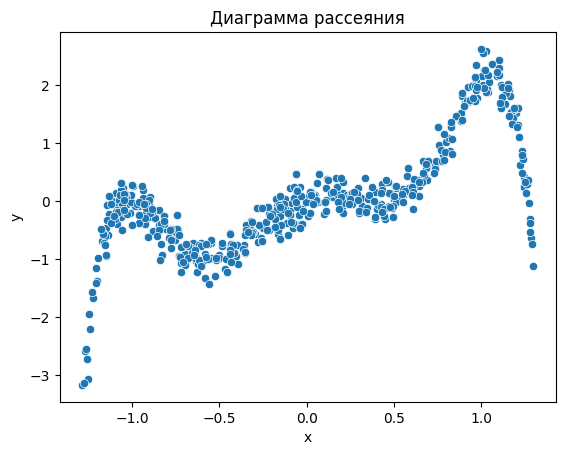

In [ ]:
sns.scatterplot(x=poly2['x'], y=poly2['y']).set_title('Диаграмма рассеяния')

In [ ]:
poly2_np = StandardScaler().fit_transform(poly2)
poly2 = pd.DataFrame(data=poly2_np.T, index=['x', 'y']).T

### 2.2. Используя train_test_split разбейте выборку на обучающую и тестовую. Проверьте, что тестовая выборка соответствует обучающей.


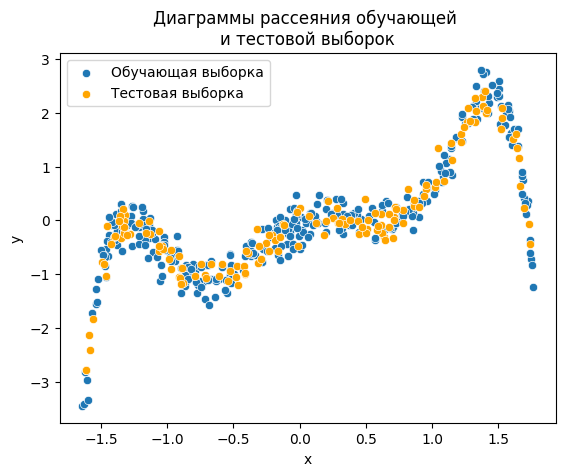

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(poly2.iloc[:, :-1],
                                                    poly2['y'], test_size=0.3,
                                                    random_state=RS)
sns.scatterplot(x=X_train['x'], y=y_train, label='Обучающая выборка')
sns.scatterplot(x=X_test['x'], y=y_test, c='orange',
                label='Тестовая выборка').set_title(
                    'Диаграммы рассеяния обучающей \nи тестовой выборок')
plt.show()

### 2.3. Проверьте работу стандартной линейной регрессии на загруженных данных. Постройте диаграмму рассеяния данных с выделенной полученной линией регрессии. Объясните полученный результат.


In [ ]:
def draw_regression_line(y_pred):
    sns.scatterplot(x=X_train['x'], y=y_train, label='Обучающая выборка')
    sns.scatterplot(x=X_test['x'], y=y_test, c='orange',
                    label='Тестовая выборка').set_title(
                        'Диаграмма рассеяния обучающей \nи тестовой выборок\n и линия регрессии')
    sns.lineplot(x=np.arange(-1.7, 1.8, 0.01), y=y_pred, c='red',
                 label='Линия регрессии')

r2_train = 0.5285820353234638; r2_test = 0.5684575651524473
mae_train = 0.538333372220498; mae_test = 0.5298956715955498
mape_train = 220.25386367768954; mape_test = 653.0080234629944


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


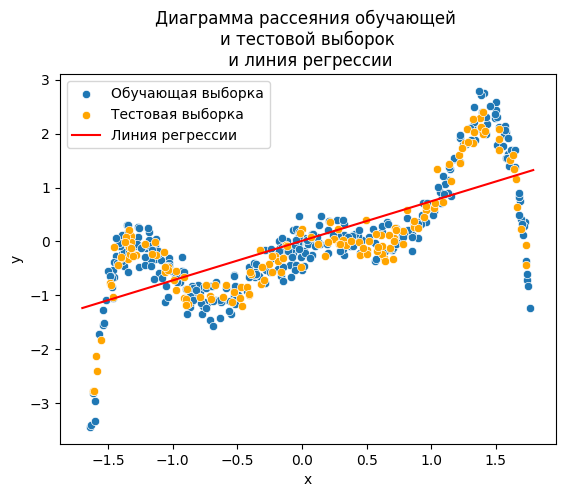

In [ ]:
lin_reg.fit(X_train, y_train)
y_pred_train = lin_reg.predict(X_train)
y_pred_test = lin_reg.predict(X_test)
models_info = {'LinearRegression': [lin_reg.coef_, lin_reg.intercept_]}
compute_regression_metrics(y_pred_train, y_pred_test, 'LinearRegression')
draw_regression_line(lin_reg.predict(np.arange(-1.7, 1.8, 0.01).reshape(-1, 1)))

### 2.4. Конструируя полиномиальный признаки для разных степеней полинома найдите степень полинома наилучшим образом аппроксимирующая данные. Постройте график зависимости коэффициента детерминации от степени полинома(на одном графике изобразите линии для обучающей и тестовой выборки отдельно). Сделайте вывод о том, при какой степени полинома модель начинает переобучаться.


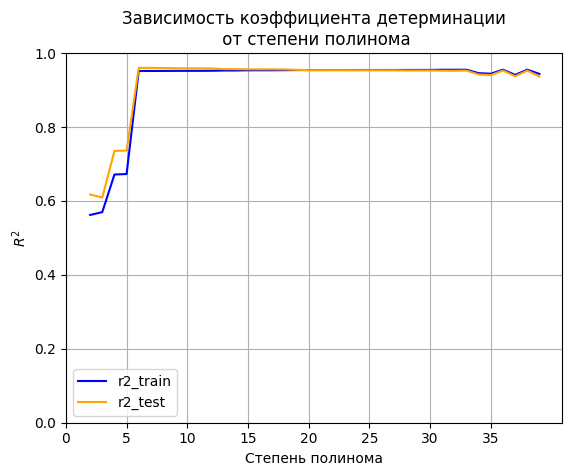

In [ ]:
from sklearn.preprocessing import PolynomialFeatures


r2_train_list, r2_test_list = [], []
for i in range(2, 40):
    X_train_polynom = PolynomialFeatures(i, include_bias=False).fit_transform(X_train)
    X_test_polynom = PolynomialFeatures(i, include_bias=False).fit_transform(X_test)
    lin_reg.fit(X_train_polynom, y_train)
    y_pred_train = lin_reg.predict(X_train_polynom)
    y_pred_test = lin_reg.predict(X_test_polynom)
    r2_train_list.append(r2_score(y_train, y_pred_train))
    r2_test_list.append(r2_score(y_test, y_pred_test))
plt.plot(np.arange(2, 40), r2_train_list, c='blue', label='r2_train')
plt.plot(np.arange(2, 40), r2_test_list, c='orange', label='r2_test')
plt.title('Зависимость коэффициента детерминации\n от степени полинома')
plt.ylim((0, 1))
plt.legend()
plt.grid()
plt.xlabel('Степень полинома')
plt.ylabel('$R^2$')
plt.xticks(np.arange(0, 40, 5))
plt.show()

### 2.5. Для выбранной степени полинома, рассчитайте и проанализируйте полученные коэффициенты. Рассчитай значение метрик коэффициент детерминации, MAPE, MAE.


In [ ]:
X_train_polynom = PolynomialFeatures(6, include_bias=False).fit_transform(X_train)
X_test_polynom = PolynomialFeatures(6, include_bias=False).fit_transform(X_test)
lin_reg.fit(X_train_polynom, y_train)
print(f"coeffs = {lin_reg.coef_}")
print(f"intercept = {lin_reg.intercept_}")
y_pred_train = lin_reg.predict(X_train_polynom)
y_pred_test = lin_reg.predict(X_test_polynom)
models_info['PolynomalRegression'] = [lin_reg.coef_, lin_reg.intercept_]
compute_regression_metrics(y_pred_train, y_pred_test, 'PolynomalRegression')

coeffs = [ 1.08563669 -2.63136731 -0.77934903  3.76719426  0.34714399 -1.09193164]
intercept = -0.037206129149112324
r2_train = 0.9516868902698403; r2_test = 0.9601095894162115
mae_train = 0.1756879093504469; mae_test = 0.1564958706255694
mape_train = 83.70000157075901; mape_test = 117.33836009813152


### 2.6. Для выбранной степени полинома, постройте диаграмму рассеяния данных с линией соответствующей полученному полиному. Сделайте выводы о качестве аппроксимации.


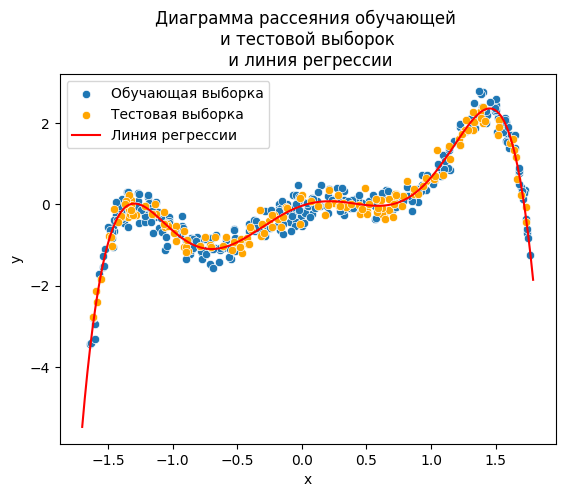

In [ ]:
X = PolynomialFeatures(6, include_bias=False).fit_transform(
    np.arange(-1.7, 1.8, 0.01).reshape(-1, 1))
draw_regression_line(lin_reg.predict(X))

In [ ]:
X.shape

(350, 6)

### 2.7. Для выбранной степени полинома, решите задачу нелинейной регрессии без конструирования полиномиальных признаков и используя библиотеку TensorFlow.


In [ ]:
%pip install -q tqdm

In [ ]:
from tqdm.auto import tqdm

X_train_polynom = PolynomialFeatures(6).fit_transform(X_train)
X_test_polynom = PolynomialFeatures(6).fit_transform(X_test)
w = gradient_descent(X_train_polynom, y_train)
y_pred_test = tf.linalg.matvec(X_test_polynom, w)
y_pred_train = tf.linalg.matvec(X_train_polynom, w)
max_r2_score = r2_score(y_test, y_pred_test)
best_w = w
for i in tqdm(range(10)):
    w = gradient_descent(X_train_polynom, y_train)
    y_pred_train = tf.linalg.matvec(X_train_polynom, w)
    y_pred_test = tf.linalg.matvec(X_test_polynom, w)
    if r2_score(y_test, y_pred_test) > max_r2_score:
        max_r2_score = r2_score(y_test, y_pred_test)
        best_w = w

  0%|          | 0/10 [00:00<?, ?it/s]

### 2.8. Рассчитай метрики коэффициент детерминации, MAPE, MAE, а также постройте диаграмму рассеяния для данных линией соответствующей полученному полиному, для модели полученной при помощи TensorFlow.


In [ ]:
y_pred_train = tf.linalg.matvec(X_train_polynom, best_w)
y_pred_test = tf.linalg.matvec(X_test_polynom, best_w)
models_info['GradientDescent'] = [best_w[1:].numpy(), best_w[0].numpy()]
compute_regression_metrics(y_pred_train, y_pred_test, 'GradientDescent')

r2_train = 0.9136312772757834; r2_test = 0.9403811888399546
mae_train = 0.24166693398360004; mae_test = 0.19225144687561363
mape_train = 170.64797574425546; mape_test = 210.15843432627685


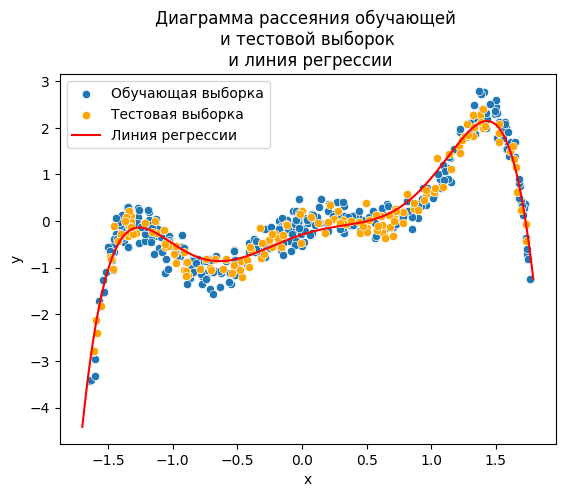

In [ ]:
X = PolynomialFeatures(6).fit_transform(
    np.arange(-1.7, 1.8, 0.01).reshape(-1, 1))
y_pred = tf.linalg.matvec(X, best_w)
draw_regression_line(y_pred)

### 2.9. Сравните результаты полученные с/без конструирования полиномиальных признаков.


In [ ]:
models_info_pd = pd.DataFrame(models_info, index=['coeffs', 'intercept',
                                                  'r2_train', 'r2_test',
                                                  'mae_train', 'mae_test',
                                                  'mape_train', 'mape_test',
                                                  'dw_train', 'dw_test',
                                                  'white_train', 'white_test',
                                                  'norm_distr_train',
                                                  'norm_distr_test']).T
models_info_pd

,coeffs,intercept,r2_train,r2_test,mae_train,mae_test,mape_train,mape_test,dw_train,dw_test,white_train,white_test,norm_distr_train,norm_distr_test
LinearRegression,[0.7329049744328467],0.011608,0.528582,0.568458,0.538333,0.529896,220.253864,653.008023,1.864989,1.919171,0.0,0.0,0.0,0.00036
PolynomalRegression,"[1.0856366873504253, -2.6313673057830917, -0.7...",-0.037206,0.951687,0.96011,0.175688,0.156496,83.700002,117.33836,2.016992,2.024651,0.126662,0.246912,0.132532,0.814414
GradientDescent,"[0.8904006842970673, -0.9670037097989711, -0.3...",-0.292969,0.913631,0.940381,0.241667,0.192251,170.647976,210.158434,1.969697,1.850076,0.303461,0.759832,0.535272,0.422639


## 3. Оценка модели регрессии


### 3.1. Загрузите набор данных Student_Performance.csv . Данный набор данных содержит информацию о характеристиках студента, а также качестве его обучения.


In [ ]:
students = pd.read_csv('sample_data/Student_Performance.csv')
students.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


### 3.2. Проведите предобработку набора данных - замена текстовых данных, удаление null значений, удаление дубликатов. Разделите на обучающую и тестовую выборку.


In [ ]:
students.dropna(inplace=True)
students.drop_duplicates(inplace=True)

In [ ]:
students.shape

(9873, 6)

In [ ]:
np.unique(students['Extracurricular Activities'])

array(['No', 'Yes'], dtype=object)

In [ ]:
students.replace(['Yes', 'No'], [1, 0], inplace=True)

In [ ]:
students.describe()

In [ ]:
students_np = StandardScaler().fit_transform(students)
students = pd.DataFrame(data=students_np.T, index=students.columns).T
students.describe()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,9.873000e+03,9.873000e+03,9.873000e+03,9.873000e+03,9.873000e+03,9.873000e+03
mean,-8.672177e-17,-8.348319e-17,-1.381791e-16,2.382150e-16,-1.201870e-16,-9.967605e-17
std,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00
min,-1.541976e+00,-1.699369e+00,-9.900224e-01,-1.491315e+00,-1.598505e+00,-2.354102e+00
25%,-7.694624e-01,-8.912755e-01,-9.900224e-01,-9.022472e-01,-9.009252e-01,-7.922205e-01
50%,3.051559e-03,-2.546084e-02,-9.900224e-01,2.758888e-01,1.454439e-01,-1.127947e-02
75%,7.755655e-01,8.980748e-01,1.010078e+00,8.649568e-01,8.430232e-01,7.696615e-01
max,1.548079e+00,1.706168e+00,1.010078e+00,1.454025e+00,1.540603e+00,2.331544e+00


Text(0.5, 1.02, 'Попарные диаграммы рассеяния и гистограммы')

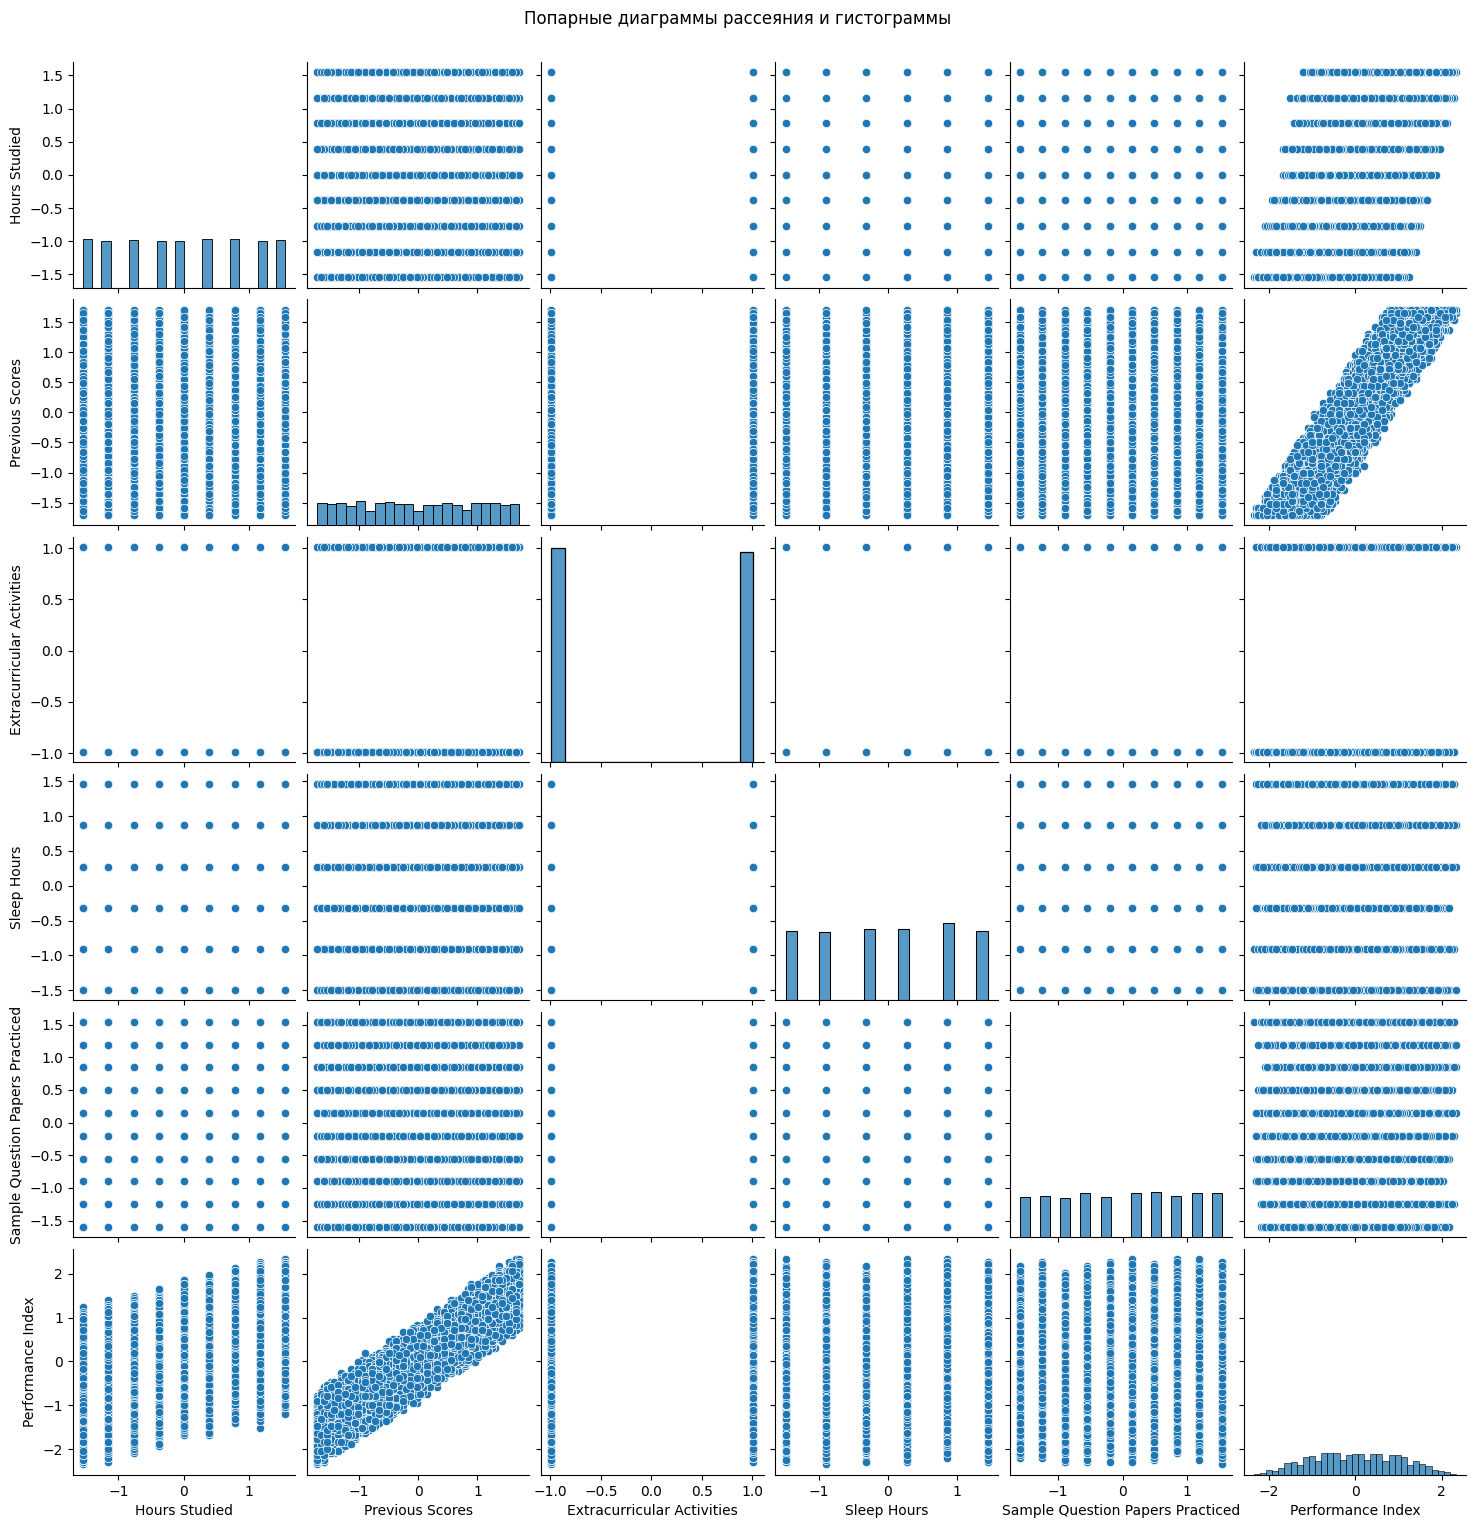

In [ ]:
g = sns.pairplot(students)
g.fig.suptitle('Попарные диаграммы рассеяния и гистограммы', y=1.02)

Text(0.5, 1.0, 'Корреляционная матрица')

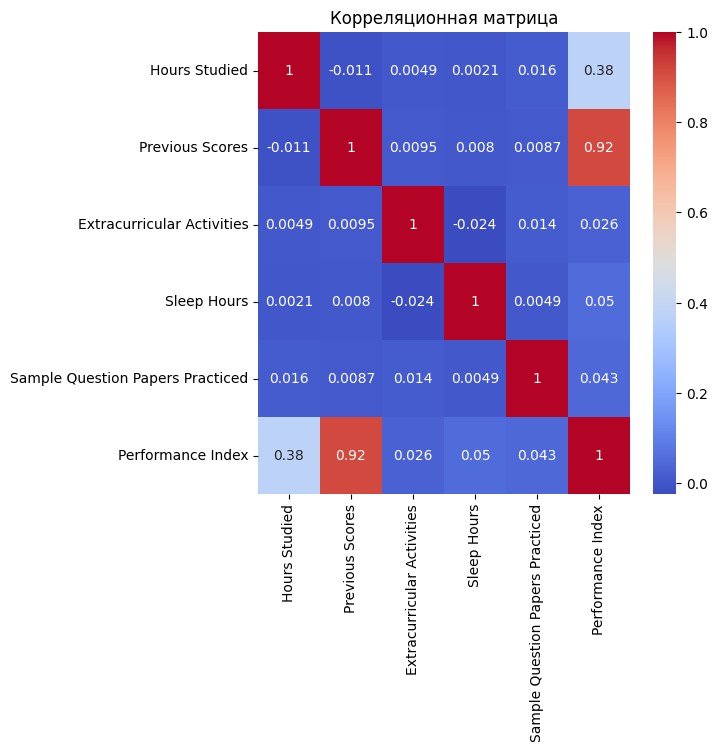

In [ ]:
plt.figure(figsize=(6, 6))
sns.heatmap(students.corr(), annot=True, cmap='coolwarm').set_title('Корреляционная матрица')

### 3.3. Постройте модель, которая будет предсказывать значение признака Performance Index на основе остальных признаков. Модель выберите самостоятельно.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(students.iloc[:, :-1],
                                                    students['Performance Index'],
                                                    test_size=0.3,
                                                    random_state=RS)

In [ ]:
lin_reg.fit(X_train, y_train)
y_pred_train = lin_reg.predict(X_train)
y_pred_test = lin_reg.predict(X_test)
models_info = {'LinearRegression': [lin_reg.coef_, lin_reg.intercept_]}
compute_regression_metrics(y_pred_train, y_pred_test, 'LinearRegression')

r2_train = 0.9888937265788157; r2_test = 0.9881593003934889
mae_train = 0.08400118700224841; mae_test = 0.08570565721224953
mape_train = 31.942532005142994; mape_test = 34.16490374050489


In [ ]:
print_best_estimator(X_train, y_train, Lasso(),
 {'alpha': np.arange(0.001, 1.0, 0.001)})

Lasso(alpha=0.001)
R2 = 0.9888599729933663


In [ ]:
print_best_estimator(X_train, y_train, Lasso(),
 {'alpha': np.arange(0.000001, 0.001, 0.000001)})

Lasso(alpha=3.9999999999999996e-05)
R2 = 0.9888645362870687


In [ ]:
lasso = Lasso(4e-5)
lasso.fit(X_train, y_train)
models_info['Lasso'] = [lasso.coef_, lasso.intercept_ ]
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)
compute_regression_metrics(y_pred_train, y_pred_test, 'Lasso')

r2_train = 0.9888937186864745; r2_test = 0.9881584584204298
mae_train = 0.08400105352849233; mae_test = 0.08570874768496263
mape_train = 31.942505965102992; mape_test = 34.164847280300116


In [ ]:
print_best_estimator(X_train, y_train, Ridge(),
 {'alpha': np.arange(0.001, 1.0, 0.001)})

Ridge(alpha=0.156)
R2 = 0.9888645292903895


In [ ]:
ridge = Ridge(alpha=0.156)
ridge.fit(X_train, y_train)
models_info['Ridge'] = [ridge.coef_, ridge.intercept_]
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)
compute_regression_metrics(y_pred_train, y_pred_test, 'Ridge')

r2_train = 0.9888937260739591; r2_test = 0.9881592505503204
mae_train = 0.08400121502653807; mae_test = 0.08570576319488078
mape_train = 31.941920379106527; mape_test = 34.16429962053682


In [ ]:
print_best_estimator(X_train, y_train, ElasticNet(),
 {'alpha': np.arange(0.0001, 0.001, 0.0001), 'l1_ratio': np.arange(0.0001, 0.001, 0.0001)})

ElasticNet(alpha=0.0001, l1_ratio=0.0009000000000000001)
R2 = 0.9888645242817141


In [ ]:
en = ElasticNet(alpha=0.0001, l1_ratio=0.0009)
en.fit(X_train, y_train)
models_info['ElasticNet'] = [en.coef_, en.intercept_]
y_pred_train = en.predict(X_train)
y_pred_test = en.predict(X_test)
compute_regression_metrics(y_pred_train, y_pred_test, 'ElasticNet')

r2_train = 0.9888937166664861; r2_test = 0.9881590702879347
mae_train = 0.08400133507338792; mae_test = 0.08570615808462073
mape_train = 31.93982664412035; mape_test = 34.16223063424329


In [ ]:
X_train_tmp = np.insert(X_train, 0, np.ones(len(X_train)), axis=1)
X_test_tmp = np.insert(X_test, 0, np.ones(len(X_test)), axis=1)
w = gradient_descent(X_train_tmp, y_train)
y_pred_test = tf.linalg.matvec(X_test_tmp, w)
max_r2_score = r2_score(y_test, y_pred_test)
best_w = w
for i in range(10):
    w = gradient_descent(X_train_tmp, y_train)
    y_pred_test = tf.linalg.matvec(X_test_tmp, w)
    if r2_score(y_test, y_pred_test) > max_r2_score:
        max_r2_score = r2_score(y_test, y_pred_test)
        best_w = w
y_pred_train = tf.linalg.matvec(X_train_tmp, best_w)
y_pred_test = tf.linalg.matvec(X_test_tmp, best_w)
models_info['GradientDescent'] = [best_w[1:].numpy(), best_w[0].numpy()]
compute_regression_metrics(y_pred_train, y_pred_test, 'GradientDescent')

r2_train = 0.988893723685474; r2_test = 0.9881598056820327
mae_train = 0.08400065385280413; mae_test = 0.08570414486520712
mape_train = 31.940314148657638; mape_test = 34.16345530571853


In [ ]:
models_info_pd = pd.DataFrame(models_info, index=['coeffs', 'intercept',
                                                  'r2_train', 'r2_test',
                                                  'mae_train', 'mae_test',
                                                  'mape_train', 'mape_test',
                                                  'dw_train', 'dw_test',
                                                  'white_train', 'white_test',
                                                  'norm_distr_train',
                                                  'norm_distr_test']).T
models_info_pd

,coeffs,intercept,r2_train,r2_test,mae_train,mae_test,mape_train,mape_test,dw_train,dw_test,white_train,white_test,norm_distr_train,norm_distr_test
LinearRegression,"[0.3840430082026589, 0.918421563187469, 0.0144...",-0.001075,0.988894,0.988159,0.084001,0.085706,31.942532,34.164904,1.968227,2.020821,0.6366,0.85389,0.55195,0.297029
Lasso,"[0.38400360657702004, 0.9183819128107993, 0.01...",-0.001075,0.988894,0.988158,0.084001,0.085709,31.942506,34.164847,1.968226,2.020746,0.631237,0.853622,0.553706,0.297236
Ridge,"[0.3840342474294577, 0.9184008332556873, 0.014...",-0.001075,0.988894,0.988159,0.084001,0.085706,31.94192,34.1643,1.968224,2.020803,0.629202,0.853789,0.552715,0.297132
ElasticNet,"[0.3840041689603308, 0.918329725005767, 0.0144...",-0.001076,0.988894,0.988159,0.084001,0.085706,31.939827,34.162231,1.968213,2.020742,0.631919,0.853442,0.555341,0.297488
GradientDescent,"[0.38407409312097573, 0.9184204241176667, 0.01...",-0.00107,0.988894,0.98816,0.084001,0.085704,31.940314,34.163455,1.968217,2.020844,0.623661,0.854019,0.5508,0.296546


In [ ]:
en.coef_

array([0.38400417, 0.91832973, 0.0144939 , 0.04153552, 0.02886487])

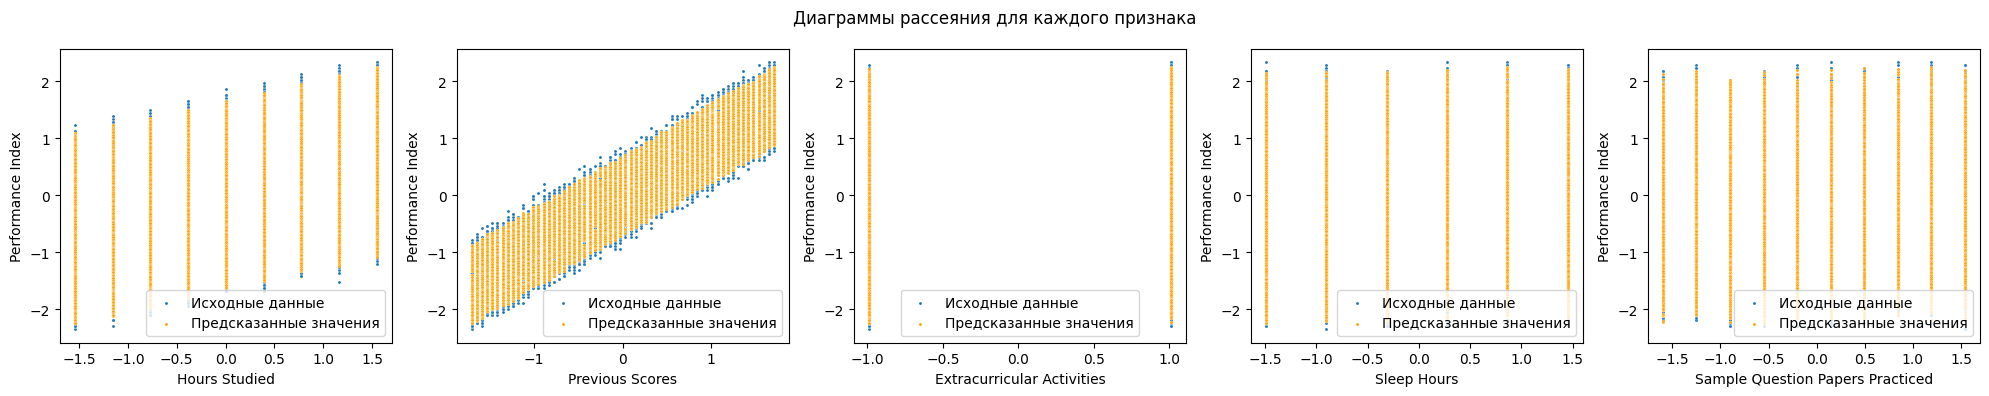

In [ ]:
y_pred = en.predict(students.iloc[:, :-1])
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 4))
columns = students.columns[:-1]
for i, column in enumerate(columns):
    sns.scatterplot(x=students[column], y=students['Performance Index'],
                    ax=axes[i], s=5, label='Исходные данные')
    sns.scatterplot(x=students[column], y=y_pred, ax=axes[i], c='orange',
                    label='Предсказанные значения', s=5)
fig.suptitle('Диаграммы рассеяния для каждого признака')
plt.tight_layout()
plt.show()